[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/tree/viktorme/Lab-5/lab5_integration.ipynb)
# Lab 5: Quadrature #
**Viktor Meyer - DD2363 Methods in Scientific Computing**

# **Abstract**
This lab is an exercise in approximation methods of integrals. Multiple methods were implemented with different characteristics. Two of the methods provided very close approximations in a single evaluation while the third method had an iterative approach with the goal of eventually converging.

# **Environment**
To have access to the necessary modules you have to run this cell.

In [201]:
# Load necessary modules.

import numpy as np
import scipy.integrate as integrate
import math
import random

from matplotlib import pyplot as plt

# **Introduction**
The methods to be implemented were covered in the during lectures and definitions are available in the lecture notes. The aim of this lab is to approach the problem of integrating functions using approximation. The mandatory part includes 2-point Gauss quadrature over a unit interval, 3-point edge midpoint quadrature over a reference triangle, Monte Carlo quadrature over a unit interval. There is also an extra assignment Monte Carlo quadrature over a reference triangle.
> [1] LN-DD2363-part6.pdf, p. 161

# **Methods**

### 2-point Gauss quadrature over a unit interval ###
Code is commented with references to the theoretical background.
> [2] LN-DD2363-part6.pdf, pp. 205-206

> [3] http://mathforcollege.com/nm/mws/gen/07int/mws_gen_int_txt_gaussquadrature.pdf

In [202]:
def randpoly():
    a = random.uniform(1, 10)
    b = random.uniform(1, 10)
    c = random.uniform(1, 10)
    d = random.uniform(1, 10)
    
    f = lambda x : a*math.pow(x,3) + b*math.pow(x,2) + c*math.pow(x,1) + d
    F = lambda x : a*math.pow(x,4)/4 + b*math.pow(x,3)/3 + c*math.pow(x,2)/2 + d*math.pow(x,1)/1
    
    return [f, F(1) - F(0)]

def gaussquadunit(f):
    
    # c1 = (b-a)/2. [3]
    c1 = (1-0)/2
    
    # c2 = ((b-a)/2). [3]
    c2 = (1-0)/2
    
    # x1 = ((b-a)/2)*(-1/sqrt(3))+((b-a)/2). [3]
    x1 = (1-0)/2*(-1/math.sqrt(3))+(1-0)/2 
    
    # x2 = ((b-a)/2)*(-1/sqrt(3))+((b-a)/2). [3]
    x2 = (1-0)/2*(1/math.sqrt(3))+(1-0)/2
    
    return f(x1)*c1 + f(x2)*c2

### 3-point edge midpoint quadrature over a reference triangle ###
Code is commented with references to the theoretical background.
> [4] LN-DD2363-part6.pdf, pp. 206

> [5] http://www.cs.rpi.edu/~flaherje/pdf/fea6.pdf

In [203]:
def randtet():
    a = random.uniform(1, 10)
    b = random.uniform(1, 10)
    c = random.uniform(1, 10)
    d = random.uniform(1, 10)
    e = random.uniform(1, 10)
    f = random.uniform(1, 10)
    
    fn = lambda x,y : a*math.pow(x,2) + b*math.pow(y,2) + c*x*y + d*x + e*y + f
    Fn = (1/24)*(2*a+2*b+c+4*d+12*f+4*e)
    
    return [fn, Fn]

def gaussquadtriangle(f):
    
    # An 3-point rule which is exact for quadratic integrands is obtained by choosing
    # the quadrature points as the midpoints of the three edges, with weights
    # w0=w1=w2=1/6,motivated by the symmetry of the quadrature points. [4]
    w0 = 1/6
    w1 = 1/6
    w2 = 1/6
    
    # As expected the optimal evaluation point is the centroid of the triangle. [5]
    x0 = [0, 0.5]
    x1 = [0.5, 0.5]
    x2 = [0.5, 0]
    
    return f(x0[0],x0[1])*w0 + f(x1[0],x1[1])*w1+f(x2[0],x2[1])*w2

### Monte Carlo quadrature over a unit interval ###
Monte Carlo integration samples a function at random. That is, the algorithm evaluates n samples at random positions over its interval. With a large enough samples size (law of large numbers) the result will converge to the exact solution.
> [6] LN-DD2363-part6.pdf, pp. 224-225

In [204]:
def montecarlounit(f, n):
    
    result = 0
    
    for i in range(n):
        result += f(random.uniform(0,1))
    
    result /= n
    
    return result

# **Results**

### 2-point Gauss quadrature over a unit interval  ###
We check that the approximation is close enough to the exact solution.

In [205]:
def test_gaussquadunit():
    
    for i in range(1, 1000, 1):
      poly = randpoly()
      apx = gaussquadunit(poly[0])
      assert np.isclose(apx, poly[1])
        
    print("Test Completed Successfully!")
    
test_gaussquadunit()

Test Completed Successfully!


### 3-point edge midpoint quadrature over a reference triangle  ###
We check that the approximation is close enough to the exact solution.

In [206]:
def test_gaussquadtriangle():
    
    for i in range(1, 1000, 1):
      tet = randtet()
      apx = gaussquadtriangle(tet[0])
      assert np.isclose(apx, tet[1])
        
    print("Test Completed Successfully!")
    
test_gaussquadtriangle()

Test Completed Successfully!


### Monte Carlo quadrature over a unit interval ###
We check that the error converges towards zero as the number of samples increases. By inspection it is apparent that the convergence rate resembles 1/sqrt(samples).

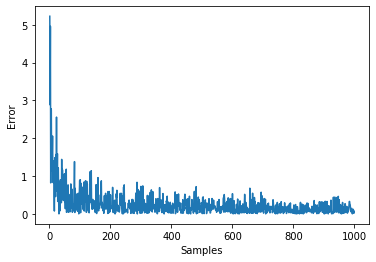

In [207]:
def test_montecarlo():
    
    samples = np.array([])
    errs = np.array([])
    poly = randpoly()
    
    for i in range(1, 1000, 1):
      apx = montecarlounit(poly[0], i)
      samples = np.append(samples, i)
      err = apx-poly[1]
      errs = np.append(errs, np.abs(err))

    plt.plot(samples, errs)
    plt.xlabel("Samples")
    plt.ylabel("Error")
    
    plt.show()
    
test_montecarlo()

# **Discussion**

This lab showed that approximation methods can yield tight solutions. Monte Carlo iteration was very interesting since it is very simple while still being able to yield accurate results. That being said, there is of course the downside of randomness and the need for large sample sizes.